In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv('titanic.csv',usecols=['Pclass','Sex','Fare','Survived','Age'])


In [11]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [12]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [13]:
df.isnull().sum()/df.shape[0]*100

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [14]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [16]:
new_df=df.dropna()
new_df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
889,1,1,male,26.0,30.0000


In [17]:
new_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

<Axes: xlabel='Pclass'>

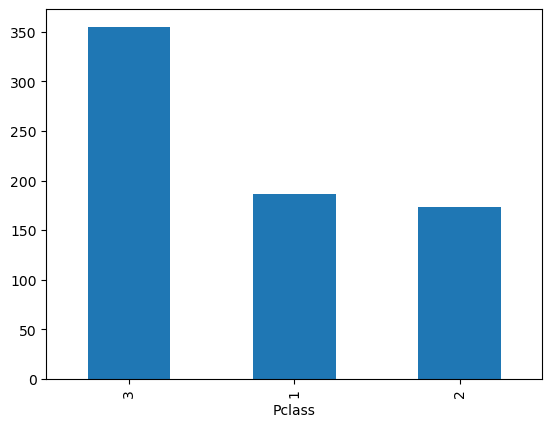

In [18]:
new_df['Pclass'].value_counts().plot(kind='bar')

<Axes: xlabel='Survived'>

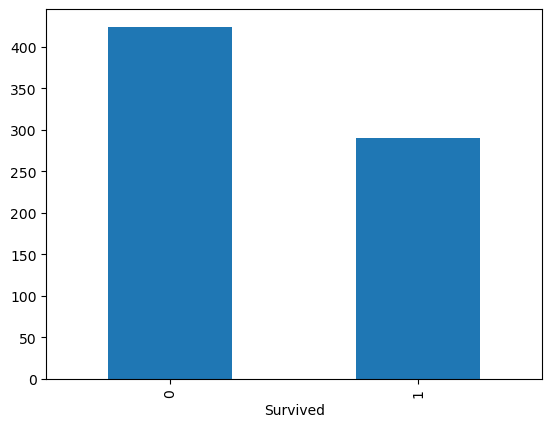

In [19]:
new_df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Sex'>

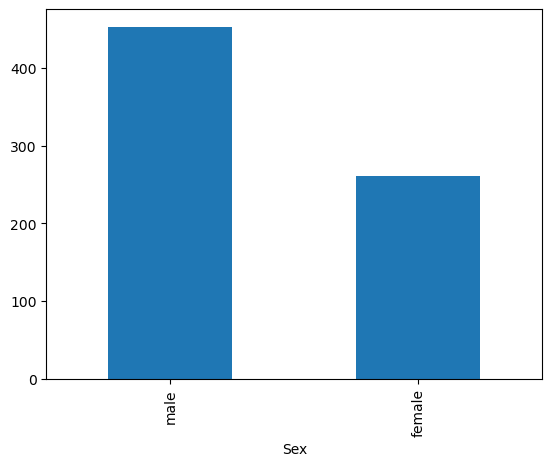

In [20]:
new_df['Sex'].value_counts().plot(kind='bar')

<Axes: xlabel='Sex'>

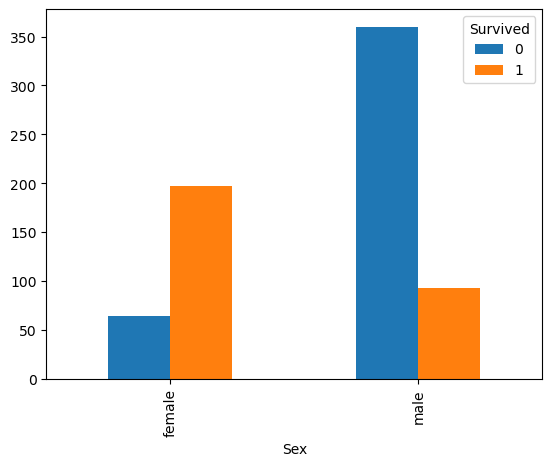

In [21]:
pd.crosstab(new_df['Sex'],new_df['Survived']).plot(kind='bar')

In [34]:
corr=new_df[['Survived','Pclass','Age','Fare']].corr()
corr


,Survived,Pclass,Age,Fare
Survived,1.000000,-0.359653,-0.077221,0.268189
Pclass,-0.359653,1.000000,-0.369226,-0.554182
Age,-0.077221,-0.369226,1.000000,0.096067
Fare,0.268189,-0.554182,0.096067,1.000000


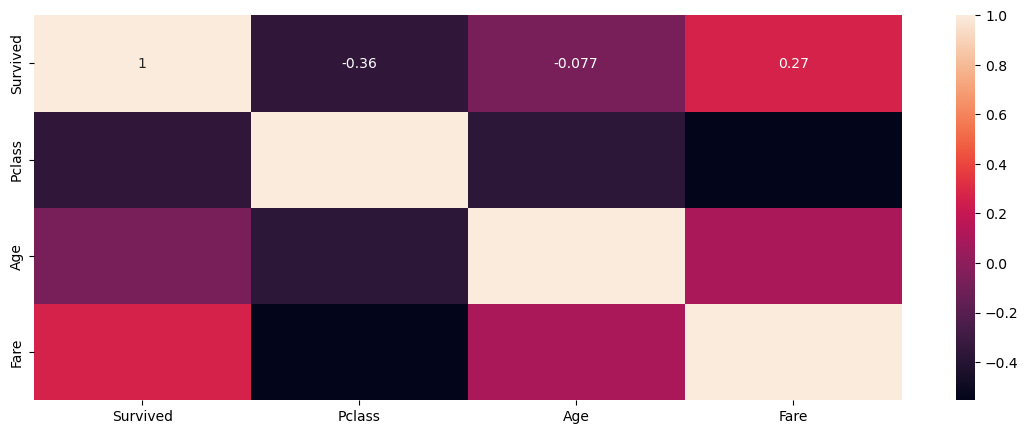

In [36]:
plt.figure(figsize=(14,5))
sns.heatmap(new_df[['Survived','Pclass','Age','Fare']].corr(),annot=True)
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le_sex=LabelEncoder()
new_df['Sex']=le_sex.fit_transform(new_df['Sex'])
new_df['Sex']

C:\Users\user\AppData\Local\Temp\ipykernel_39548\2944502370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sex']=le_sex.fit_transform(new_df['Sex'])


0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 714, dtype: int32

In [39]:
le_sex.classes_

array(['female', 'male'], dtype=object)

In [40]:
le_sex_map=dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))
le_sex_map

{'female': 0, 'male': 1}

In [41]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [42]:
new_df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
885,0,3,0,39.0,29.1250
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
889,1,1,1,26.0,30.0000


In [46]:
X=new_df.iloc[:,1:5]
X


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
885,3,0,39.0,29.1250
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
889,1,1,26.0,30.0000


In [45]:
y=new_df['Survived']
y.shape

(714,)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.head()

,Pclass,Sex,Age,Fare
37,3,1,21.0,8.0500
58,2,0,5.0,27.7500
57,3,1,28.5,7.2292
94,3,1,59.0,7.2500
209,1,1,40.0,31.0000


In [50]:
y_train.head()

37     0
58     1
57     0
94     0
209    1
Name: Survived, dtype: int64

In [51]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [52]:
new_df.head(3)

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250


In [53]:
help(tree.plot_tree)

Help on function plot_tree in module sklearn.tree._export:

plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)
    Plot a decision tree.
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    The visualization is fit automatically to the size of the axis.
    Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
    the size of the rendering.
    
    Read more in the :ref:`User Guide <tree>`.
    
    .. versionadded:: 0.21
    
    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be plotted.
    
    max_depth : int, default=None
        The maximum depth of the representation. If None, the tree is fully
        generated.
    
    feature_names : list of str, default=None
        Names of

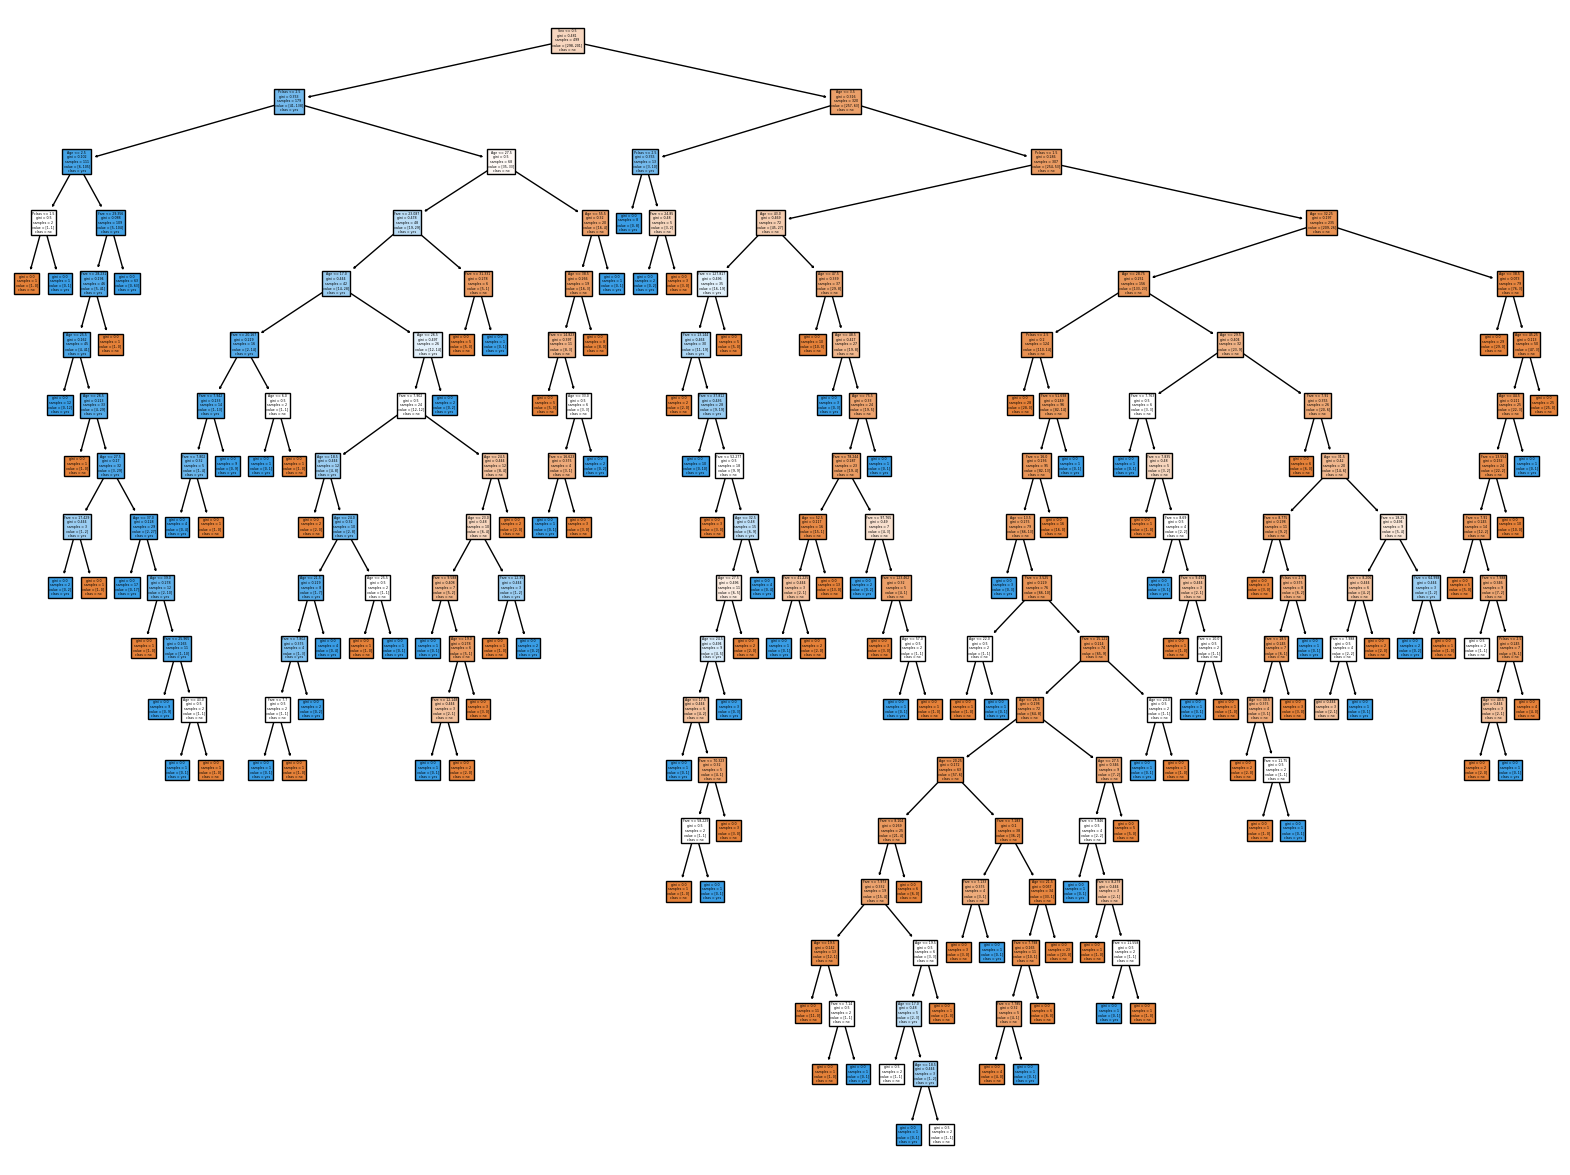

In [54]:
fig=plt.figure(figsize=(20,15))
_=tree.plot_tree(model,feature_names=['Pclass','Sex','Age','Fare'],class_names=['no','yes'],filled=True)

In [ ]:
#Passenger with Pclass3,Sex0,Age35,Fare50 will survive or not
#Yes the passenger survived

In [55]:

survive=model.predict([[3,0,35,50]])
survive[0]

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [ ]:
#Passenger with Pclass5,Sex1,Age33,Fare80 will survive or not
#No the passenger didnt survive

In [56]:
survive=model.predict([[5,1,33,80]])
survive[0]

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0